In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# def dist(i, j, data):
#     coords_i = data[i]
#     coords_j = data[j]

#     return np.sqrt(((coords_i[0] - coords_j[0])**2) + ((coords_i[1] - coords_j[1])**2))

def dist(i, j, data):
    return data[i, j]

In [19]:
def fitness(chromo, data):
    fts = 0
    for i in range(1, len(chromo)):
        prev_vertex = chromo[i - 1]
        curr_vertex = chromo[i]
        fts += dist(prev_vertex, curr_vertex, data)
    
    fts += dist(chromo[0], chromo[-1], data)

    return -fts

In [20]:
def generate_population(n, dim):
    population = [np.random.choice(dim, size=dim, replace=False) for i in range(n)]
    return population

def population_fitness(pops, data):
    return np.array([fitness(pop, data) for pop in pops])

In [21]:
# def tournament_selection(population, data, k=3):
#     group = np.random.choice(len(population), size=k, replace=False)
#     fitnesses = [(i, fitness(population[i], data)) for i in group]
#     sfs = sorted(fitnesses, key=lambda x: x[1], reverse=True)

#     return sfs[0][0]

def selection(population, data):
    pop_fts = population_fitness(population, data)
    ftssum = np.sum(pop_fts)
    proba = pop_fts / ftssum

    chosen = np.random.choice(len(population), size=2, replace=False, p=proba)

    return chosen

def select_pair(population, data):
    idx1 = selection(population, data)
    idx2 = selection(population, data)

    return idx1, idx2

In [22]:
def resolve_collision(sep1, sep2, mapping, q):
    for i in range(sep1):
        if q[i] in q[sep1:sep2]:
            candidate = mapping[q[i]]
            while True:
                if candidate in q[sep1:sep2]:
                    candidate = mapping[candidate]
                else:
                    q[i] = candidate
                    break
    for i in range(sep2, len(q)):
        if q[i] in q[sep1:sep2]:
            candidate = mapping[q[i]]
            while True:
                if candidate in q[sep1:sep2]:
                    candidate = mapping[candidate]
                else:
                    q[i] = candidate
                    break

def crossover(chromo1, chromo2):
    sep1 = np.random.randint(1, len(chromo1)-1)
    sep2 = np.random.randint(sep1+1, len(chromo1))

    q1 = chromo1.copy()
    q2 = chromo2.copy()

    for i in range(sep1, sep2):
        q1[i], q2[i] = q2[i], q1[i]

    mapping = {q1[i]: q2[i] for i in range(sep1, sep2)}
    reverse_mapping = {q2[i]: q1[i] for i in range(sep1, sep2)}

    resolve_collision(sep1, sep2, mapping, q1)
    resolve_collision(sep1, sep2, reverse_mapping, q2)

    return q1, q2
            
def mutate(chr, proba=0.01, S=3):
    chromo = chr.copy()
    for i in range(len(chromo)):
        if np.random.uniform(0, 1) < proba:
            chromo[i], chromo[(i + S) % len(chromo)] = chromo[(i + S) % len(chromo)], chromo[i]

    return chromo

In [23]:
def population_fitness(pops, data):
    return [fitness(pop, data) for pop in pops]

In [8]:
def open_data(fname):
    with open(fname, 'r') as f:
        f.readline()
        f.readline()
        f.readline()
        dim = int(f.readline().split()[-1])
        vertices = []
        f.readline()
        f.readline()
        for i in range(dim):
            coords = list(map(int, f.readline().split()))[1:]
            vertices.append(coords)

    return vertices

def open_file_with_matrix(fname, header_size, data_size, dim):
    adj_mat = []
    with open(fname, 'r') as f:
        for i in range(header_size):
            f.readline()
        for i in range(data_size):
            line = f.readline()
            adj_mat.extend(list(map(int, line.split())))

    adj_mat = np.array(adj_mat)
    
    tmp = np.zeros((dim, dim))
    tmp[np.tril_indices_from(tmp)] = adj_mat

    return tmp + tmp.T

        

In [9]:
fname = 'gr17.tsp'
data = open_file_with_matrix(fname, 7, 13, 17)

initial best fitness: 3419.0
final best fitness: 3165.0


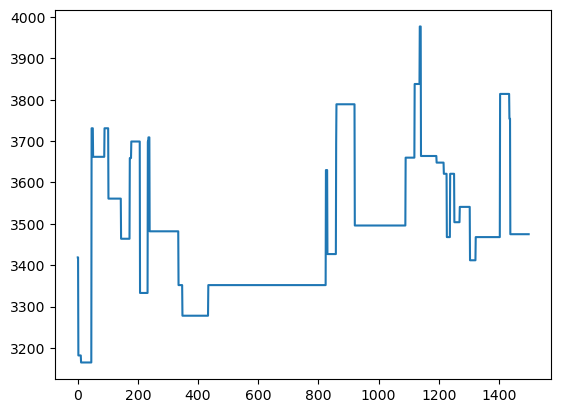

In [11]:
pop_size = 100
max_iter = 1500
mutation_proba = 0.05
mutation_shift = 6

pops = generate_population(pop_size, len(data))

fitnesses = population_fitness(pops, data)

print('initial best fitness:', -np.max(fitnesses))

best_fitness = []

for _ in range(max_iter):
    best_fts = -np.max(fitnesses)
    # if best_fitness == None or best_fitness > best_fts:
    #     best_fitness = best_fts

    best_fitness.append(best_fts)

    idx1, idx2 = selection(pops, data)
    sib1, sib2 = crossover(pops[idx1], pops[idx2])
    sib1 = mutate(sib1, mutation_proba, mutation_shift)
    sib2 = mutate(sib2, mutation_proba, mutation_shift)
    pops[idx1] = sib1
    pops[idx2] = sib2

    fitnesses[idx1] = fitness(sib1, data)
    fitnesses[idx2] = fitness(sib2, data)

plt.plot(np.arange(0, max_iter), best_fitness)

#popfts = population_fitness(pops, data)
#print('final mean fitness:', -np.mean(fitnesses))
print('final best fitness:', np.min(best_fitness))